<a href="https://colab.research.google.com/github/Adhil-Farman/car-price-prediction/blob/main/Car_price_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies


In [40]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
def __array__(self, dtype: np.dtype | None = None) -> np.ndarray:
    # Assuming self._values is a list of strings
    cleaned_values = [float(value) if value.replace('.', '', 1).isdigit() else 0.0 for value in self._values]
    return np.asarray(cleaned_values, dtype=dtype)

Data collection and processing

In [3]:
dataset = pd.read_csv("/content/train.csv")
dataset.head(5)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1],
                                                    dataset.iloc[:, -1],
                                                    test_size = 0.3,
                                                    random_state = 42)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13465 entries, 4237 to 15795
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                13465 non-null  int64  
 1   Price             13465 non-null  int64  
 2   Levy              13465 non-null  object 
 3   Manufacturer      13465 non-null  object 
 4   Model             13465 non-null  object 
 5   Prod. year        13465 non-null  int64  
 6   Category          13465 non-null  object 
 7   Leather interior  13465 non-null  object 
 8   Fuel type         13465 non-null  object 
 9   Engine volume     13465 non-null  object 
 10  Mileage           13465 non-null  object 
 11  Cylinders         13465 non-null  float64
 12  Gear box type     13465 non-null  object 
 13  Drive wheels      13465 non-null  object 
 14  Doors             13465 non-null  object 
 15  Wheel             13465 non-null  object 
 16  Color             13465 non-null  obj

In [6]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

In [8]:
X_train["Manufacturer"].value_counts()

HYUNDAI          2652
TOYOTA           2559
MERCEDES-BENZ    1478
FORD              773
CHEVROLET         756
                 ... 
SAAB                1
HAVAL               1
LAMBORGHINI         1
ASTON MARTIN        1
GREATWALL           1
Name: Manufacturer, Length: 64, dtype: int64

In [10]:
make_train = X_train["Manufacturer"].str.split(" ", expand = True)
make_test = X_test["Manufacturer"].str.split(" ", expand = True)

In [11]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

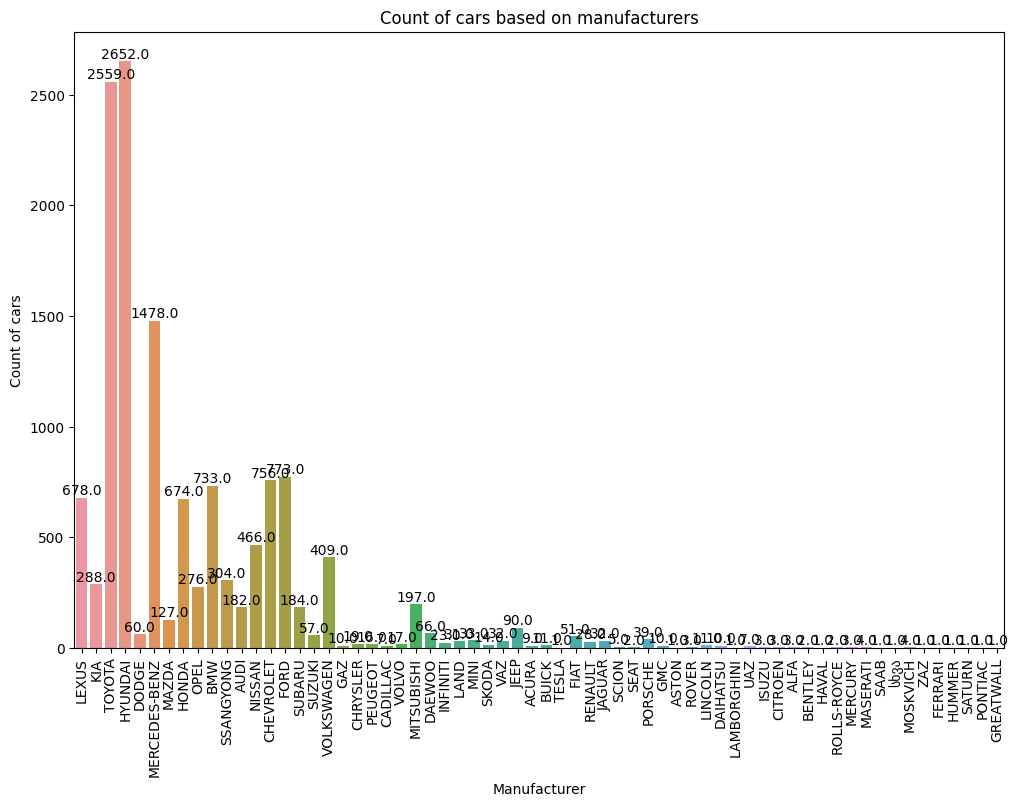

In [12]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(),
                        (p.get_x() + p.get_width() / 2.0,
                         p.get_height()),
                        ha = 'center',
                        va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [13]:
X_train.drop("Manufacturer", axis = 1, inplace = True)
X_test.drop("Manufacturer", axis = 1, inplace = True)

In [14]:
X_train.drop("Model", axis = 1, inplace = True)
X_test.drop("Model", axis = 1, inplace = True)

In [15]:
curr_time = datetime.datetime.now()
X_train['Prod. year'] = X_train['Prod. year'].apply(lambda x : curr_time.year - x)
X_test['Prod. year'] = X_test['Prod. year'].apply(lambda x : curr_time.year - x)

In [16]:
X_train["Fuel type"]

4237     Petrol
7229     Petrol
7646     Petrol
4723        LPG
7719     Petrol
          ...  
11284    Petrol
11964    Hybrid
5390     Diesel
860      Petrol
15795    Petrol
Name: Fuel type, Length: 13465, dtype: object

In [17]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [18]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


In [19]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mean(), inplace = True)

In [29]:
X_train = pd.get_dummies(X_train,columns = ["Cylinders", "Fuel type", "Engine volume", "Mileage"],drop_first = True)

In [30]:
X_test = pd.get_dummies(X_test,columns = ["Cylinders", "Fuel type", "Engine volume", "Mileage"],drop_first = True)

In [31]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Streaming output truncated to the last 5000 lines.
<ipython-input-31-9176da446f23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
<ipython-input-31-9176da446f23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[col] = 0
<ipython-input-31-9176da446f23>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `ne